In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('../../datasets/placement.csv')
print(df.shape)
df

(1000, 3)


,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


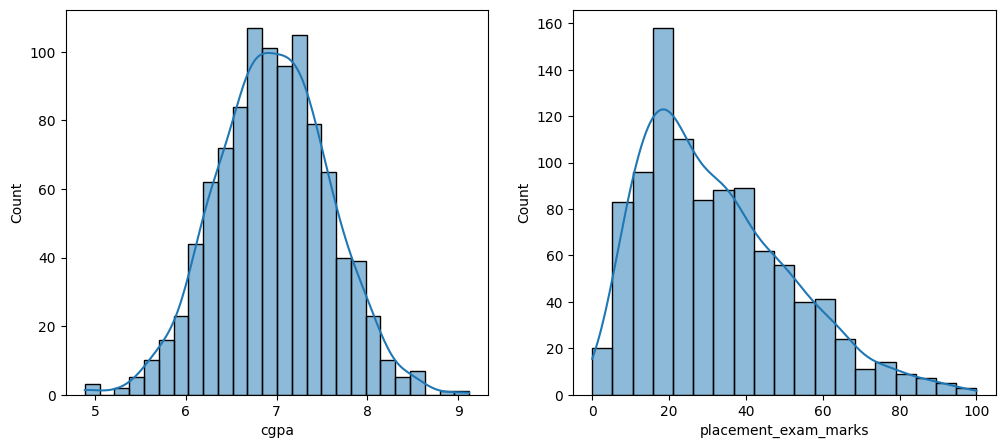

In [35]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'] , kde = True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'] , kde = True )
plt.show()

In [36]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [37]:
# zscore in cgpa 
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [38]:
highest = df['cgpa'].mean() + 3 * df['cgpa'].std()
lowest = df['cgpa'].mean() - 3 * df['cgpa'].std()
print(highest , lowest)

8.808933625397168 5.113546374602832


In [39]:
df[(df['cgpa']> highest) | (df['cgpa'] < lowest)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [40]:
# Trimming the outliers 
new_df = df[(df['cgpa']< highest) & (df['cgpa'] > lowest)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [41]:
# replacing the outliers with max and min values 
#z-score 

df['cgpa_z'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [46]:
df[df['cgpa_z'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_z
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [47]:
df['cgpa'] = np.where(
    df['cgpa'] > highest , 
    highest , 
    np.where(df['cgpa'] < lowest , lowest , df['cgpa'])
)

In [49]:
df.shape

(1000, 4)

In [51]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64